<a href="https://colab.research.google.com/github/kuihao/AIoT_Temperature-Humidity-and-Prediction-using-RaspberryPi/blob/master/testing/%E5%A2%9E%E5%8A%A0Function%E7%B6%AD%E5%BA%A6_%E6%B8%AC%E8%A9%A6SGD%E7%9A%84%E8%AE%8A%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
'''
【使用AdaGrad】
課堂測試數據 Demo：https://youtu.be/1UqCjFQiiy0
程式碼參考：https://colab.research.google.com/drive/1l_2jQ2t6FEPwTB6G7kiIFNOLRJOFU8LF?usp=sharing#scrollTo=TOAvOQ09fffp
程式碼破譯間接參考：https://ithelp.ithome.com.tw/articles/10225858
'''
# step 1. 引入 NumPy 與 Matplotlib
import matplotlib.pyplot as plt
import numpy as np

# step 2. 建立數值陣列
# x_data = [n] # 就是 Model Function 的 Input data
# y_data = [n] # 就是 Model Function 的 Output data (監督式學習就是 Ground Truth、測試時的輸出預測值)
x_data = [ 338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [ 640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

# step 2.5. 假設模型 例如：y_data = w_2 * x_data**2 + w * x_data + b
# step 3. 建立網格資料 
# 繪製的「彩色的等高線圖就是 Loss Function Space」，兩個維度分別代表參數 w 與 b
# 以下的 x, y 並不是指訓練資料，而是 Linear Model 的兩個參數 (w, b) 的自行設定的可能範圍
# 分別建立兩個一維等差陣列 x 與 y，其範圍是 # 到 #，每隔 # 產生一個值。
# x = np.arange(-16, -0.3, (16-0.2)/100) #bias shape:(100,) 
# y = np.arange(0.9, 1.1, 0.2/100) #weight shape:(100,) 
x = np.linspace(-16, -0.3, 100) #bias
y = np.linspace(-1.1, -0.9, 100) #weight
y2 = np.linspace(0.00271, 0.00279, 100) #weight

# 接著，我們建立了一個二維陣列 Z 來儲存每一個 X[n](bias), Y[n](weight) 位置上的「損失函數值」
# 注意陣列 Z 的存取，根據 pyplot 定義的參數，它會直接將矩陣內容繪製在畫布上，
# 因此 x, y 座標跟矩陣儲存示正好相反的 (y對應矩陣的列, x對應矩陣的行)， Z[y座標][x座標]
# 損失函數 L 為 L(w2, w, b) = ((y_data[n] - (w2*x_data[n]**2 + w*x_data[n] + b) )**2)/n
# [!!!]以下等高線繪圖維持在一次式
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

for i in range(len(x)):
    for j in range(len(y)):
        # Z 矩陣相當於整張圖，每個 Entry 存放座標 (b, w) 代入損失函數的 Loss 值
        b = x[i]
        w = y[j]
        w2 = 0
        Z[j][i] = 0
        # 將所有訓練資料帶入計算該座標 (b, w)的 Loss 值
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - ( w2 * x_data[n]**2 + w * x_data[n] + b ))**2
        Z[j][i] = np.sqrt(Z[j][i]/len(x_data))

In [78]:
# step 4. 決定參數
# 這裡決定 w 與 b 的起始點（從哪裡開始走）、learning rate（每一步走多遠）、
# iteration 次數（我們要走多少步）、
# 以及最後我們用兩個陣列，來分別儲存每一步我的走到的位置
# 決定 w 與 b 的起始點
# SGD(Stochastic Gradient Descent, 隨機梯度下降法) 的技巧：
# 只針對 SSE (Sum Square Error, 誤差平方和) 進行微分，
# 而非整個損失函式之 MSE (Mean Squared Error) 或 RMSE (Root Mean Square Error)
  # 二次式 loss = 48.844330609727436
  # w3 =  0 
  # w2 =  0.002667783529829328 
  # w =  1.0299915202421175 
  # b =  -9.879856516497146 
  # w2_lr =  2.8481592794565444e+27 
  # w1_lr =  3.018924033741792e+21 
  # b_lr =  1.6953513268233562e+16 
  # lr =  100
  
w3 =  0 
w2 =  0.002667783529829328 
w =  1.0299915202421175 
b =  -9.879856516497146  

# 決定 learning rate
lr = 100 # 0.0000001 

# 決定 iteration 的次數
iteration = 100000

# 給予 b, w 各自不同的 learning rate
w3_lr = 0
w2_lr =  2.8481592794565444e+27 
w1_lr =  3.018924033741792e+21 
b_lr =  1.6953513268233562e+16

In [79]:
# 儲存每一次 iterate 後的結果
w3_history = []
w2_history = []
w_history = []
b_history = []
w3_history = [w3]
w2_history = [w2]
w_history = [w]
b_history = [b]

# step 5. 執行梯度下降
# 執行梯度下降
x_data_pow2 = np.power(x_data, 2)
for i in range(iteration):
    #w3_grad = 0
    w2_grad = 0
    w_grad = 0
    b_grad = 0
    
    # 計算損失函數分別對 w 和 b 的偏微分 (計算梯度決定參數的調整變量)
    # 把每組資料計算微分之後加總起來
    for n in range(len(x_data)):
        #w3_grad += 2.0 * ( y_data[n] - ( w3 * x_data[n]**3 + w2 * x_data[n]**2 + w * x_data[n] + b ) ) * ( (-3) * x_data[n]**3 )
        w2_grad += 2.0 * ( y_data[n] - ( w3 * x_data[n]**3 + w2 * x_data[n]**2 + w * x_data[n] + b ) ) * ( (-2) * x_data[n]**2 )
        w_grad += 2.0 * ( y_data[n] - ( w3 * x_data[n]**3 + w2 * x_data[n]**2 + w * x_data[n] + b ) ) * ( (-1) * x_data[n] )
        b_grad += 2.0 * ( y_data[n] - ( w3 * x_data[n]**3 + w2 * x_data[n]**2 + w * x_data[n] + b ) ) * (-1.0)
        
    # v2 - AdaGrad: learning rate 加上了梯度平方
    #w3_lr = w3_lr + w3_grad**2
    w2_lr = w2_lr + w2_grad**2
    w_lr = w_lr + w_grad**2
    b_lr = b_lr + b_grad**2

    # 更新 w, b 位置 
    # w = w - lr * w_grad
    # b = b - lr * b_grad
    # v2 - ada
    #w3 = w3 - lr/np.sqrt(w3_lr) * w3_grad
    w2 = w2 - lr/np.sqrt(w2_lr) * w2_grad
    w = w - lr/np.sqrt(w_lr) * w_grad
    b = b - lr/np.sqrt(b_lr) * b_grad 
    
    # 紀錄 w, b 的位置 
    #w3_history.append(w3)
    w2_history.append(w2)
    w_history.append(w)
    b_history.append(b)

    #-----文字紀錄 Loss(Error)值-----#
    loss = np.sqrt(np.mean(np.power((np.dot(x_data_pow2, w2) + np.dot(x_data, w) + b) - y_data, 2)))
    if (i%10000 == 0)|(i == (iteration - 1)):
      print('Iteration = ', i, ' Loss = ', loss)
print('size of w_history:', len(w_history), 
    '\nw3 = ', w3,
    '\nw2 = ', w2,
    '\nw = ', w,
    '\nb = ', b,
    '\nw2_lr = ', w2_lr,
    '\nw1_lr = ', w_lr,
    '\nb_lr = ', b_lr,
    '\nlr = ', lr)

Iteration =  0  Loss =  48.84433060878267
Iteration =  10000  Loss =  48.84432134555408
Iteration =  20000  Loss =  48.84431244105197
Iteration =  30000  Loss =  48.844303881384384
Iteration =  40000  Loss =  48.84429565319743
Iteration =  50000  Loss =  48.844287743654235
Iteration =  60000  Loss =  48.84428014041509
Iteration =  70000  Loss =  48.84427283161817
Iteration =  80000  Loss =  48.844265805860964
Iteration =  90000  Loss =  48.84425905218257
Iteration =  99999  Loss =  48.844252560682946
size of w_history: 100001 
w3 =  0 
w2 =  0.002667176975192258 
w =  1.0304656635156135 
b =  -9.95563147164646 
w2_lr =  2.8481592794565444e+27 
w1_lr =  3.018924033741792e+21 
b_lr =  1.6953513268318288e+16 
lr =  100


loss(error) =  367.07660383205604  NOW


<function matplotlib.pyplot.show>

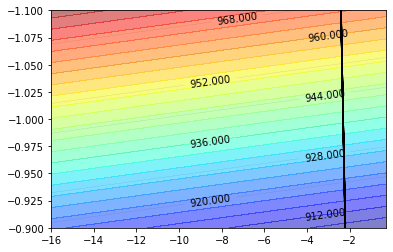

In [67]:
# [!!!]以下等高線繪圖維持在一次式
# strp 6. 繪圖
# 建立等高線圖
plt.contourf(x,y,Z, 25, alpha=0.5, cmap=plt.get_cmap('jet')) # Contour line Region = 50
# 繪製目標點(隱藏的，已由公式解證明此為一次函數的最佳解: loss=100.96372115561644)
# plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='red')
# 繪製起點
#plt.plot([b_history[0]], [w_history[0]], 's', ms=12, markeredgewidth=3, color='orange')   # starting parameter
# 繪製 w,b iteration 的結果
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black') # ms = markersize, lw = linewidth 
# 繪製結束時的參數
plt.plot([b_history[-1]], [w_history[-1]], 'x', ms=12, markeredgewidth=3, color='orange')   # ending parameter
# 定義圖形範圍
plt.xlim(-200,-100)
plt.ylim(-5,5) # plt.axis([-200, -100, -5, 5])
# 繪製 x 軸與 y 軸的標籤
# plt.xlabel(r'$b$', fontsize=16)
# plt.ylabel(r'$w$', fontsize=16)
plt.axis([-16, -0.3, -0.9, -1.1])
# 標上等高線數值
C = plt.contour(x, y, Z, 10, colors='black', linewidths=0.05)
plt.clabel(C, inline=True, fontsize=10)

loss_now = np.sqrt(np.sum(np.power(( np.dot(x_data, w)+b ) - y_data, 2))/len(x_data))
print( 'loss(error) = ', loss_now, ' NOW' )
plt.show

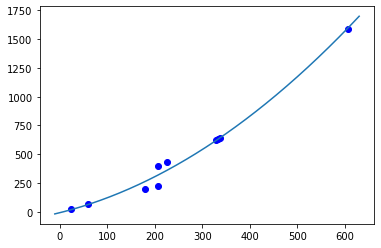

In [80]:
# 畫出訓練資料與 Linear Function 的關係圖
fig = plt.figure()
paint = fig.add_subplot()
plt.plot(x_data, y_data, 'o', c='blue')
x_pos = np.linspace(-10, 630, 640)
y_pos = w2_history[-1]*(x_pos**2) + w_history[-1]*x_pos + b_history[-1]
plt.plot(x_pos, y_pos)